<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2018


En este notebook se implementa una clasificacion binaria no-lineal utilizando una pequenia red neuronal de regresores logisticos en cadena:
1. El problema XOR
2. Regresores logísticos en cadena

<hr>
# 1. El problema XOR

<img src='res/shallow_nn/xor_problem.png'>

 # 1. Regresor Logístico

In [1]:
import numpy as np

In [2]:
def linear_activation(W, b, X):
    z = np.dot(W,X) + b
    
    return z

In [3]:
def sigmoid(z):
    '''
    Returns sigmoid activation for array z
    '''
    a = 1. / (1. + np.exp(-z)) 
    
    return a 

In [4]:
def d_sigmoid(z):
    return sigmoid(z) * (1. - sigmoid(z))

In [5]:
def loss(y, a):
    return -(y * np.log(a) + (1-y) * np.log(1-a))

In [6]:
def cost(logloss):
    return np.mean(logloss)

In [7]:
def predict_multilayer(parameters,X):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = linear_activation(W1,b1,X)
    A1 = sigmoid(Z1)
    
    Z2 = linear_activation(W2,b2,A1)
    A2 = sigmoid(Z2)

    return np.round(A2)

<hr>
# Trabajemos
3. Realicemos descenso del gradiente sobre la red neural completa.

### - Dataset XOR

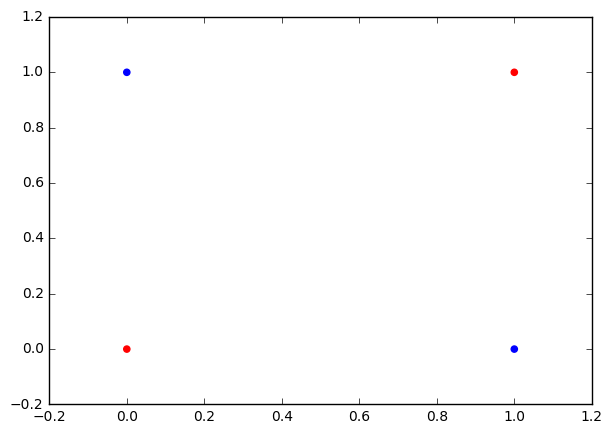

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0, 1, 1, 0]])

color= ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], color=color)

plt.show()

X = X.T

### - Inicializacion de parametros de la red.

In [10]:
def initialize_parameters(h_layers, k_factor):
    neurons_hidden_layer = 3

    k_factor = 5

    W1 = np.random.randn(neurons_hidden_layer,2) * k_factor
    b1 = np.zeros([neurons_hidden_layer,1])

    W2 = np.random.randn(1,neurons_hidden_layer) * k_factor
    b2 = np.zeros([1,1])
    
    parameters = {"W1":W1, "b1":b1, "W2":W2, "b2":b2}
    
    return parameters

<hr>
### - Apliquemos descenso del gradiente a cada regresor logístico por separado

In [11]:
'''
Metaparameters initialization
'''
num_epochs = 5000
learning_rate = 0.09

'''
Parameters initialization
'''
parameters = initialize_parameters(3, 5)
W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]

print ("parametros iniciales: ", parameters)

'''
Gradient descent
'''
for i in range(num_epochs): 
    '''
    Forward Propagation
    '''
    Z1 = linear_activation(W1, b1, X)
    A1 = sigmoid(Z1)
    
    Z2 = linear_activation(W2, b2, A1)
    A2 = sigmoid(Z2)
        
    '''
    Backward Propagation
    '''
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)
    db2 = np.mean(np.sum(dZ2, axis=1, keepdims=True))
    
    dZ1 = np.multiply(np.dot(W2.T, dZ2), d_sigmoid(Z1))
    dW1 = np.dot(dZ1, X.T)
    db1 = np.mean(np.sum(dZ1, axis=1, keepdims=True))
    
    '''
    Parameters Update
    '''
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    b1 -= learning_rate * db1
    b2 -= learning_rate * db2
    
    '''
    Cost estimation
    '''
    J = cost(loss(Y,A2))
    
    
    if(i%100 == 0):
        print("costo -- iteracion ", i, ": ", J)
        
print("parametros actualizados: ", parameters)

'''
Testing
'''
print("Predicciones del clasificador: ", predict_multilayer(parameters,X))

('parametros iniciales: ', {'b2': array([[ 0.]]), 'b1': array([[ 0.],
       [ 0.],
       [ 0.]]), 'W1': array([[-2.82404251,  2.87457928],
       [-9.16818221,  2.40106925],
       [-1.339016  ,  1.71084003]]), 'W2': array([[-3.04884719,  0.64580422,  0.56607156]])})
('costo -- iteracion ', 0, ': ', 0.81959140228187244)
('costo -- iteracion ', 100, ': ', 0.55622409905767745)
('costo -- iteracion ', 200, ': ', 0.51802945664248212)
('costo -- iteracion ', 300, ': ', 0.47498033351114033)
('costo -- iteracion ', 400, ': ', 0.43925719124888812)
('costo -- iteracion ', 500, ': ', 0.41421422609419944)
('costo -- iteracion ', 600, ': ', 0.39526042956606267)
('costo -- iteracion ', 700, ': ', 0.3781894849004574)
('costo -- iteracion ', 800, ': ', 0.35835122568455874)
('costo -- iteracion ', 900, ': ', 0.32673173126841049)
('costo -- iteracion ', 1000, ': ', 0.26542224681138404)
('costo -- iteracion ', 1100, ': ', 0.18237597324061786)
('costo -- iteracion ', 1200, ': ', 0.12495407823098978)
('

### - Visualizacion del resultado

In [12]:
import matplotlib.pyplot as plt

def visualize_lr(parameters, X, Y):
    X = X.T
    
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = pred_func(W,b,np.c_[xx.ravel(), yy.ravel()])
    Z = predict_multilayer(parameters, np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    color= ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]
    plt.scatter(X[:,0], X[:,1], color=color)
    
    plt.show()

/Users/cornelius15/anaconda2/envs/deeplearning/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/cornelius15/anaconda2/envs/deeplearning/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


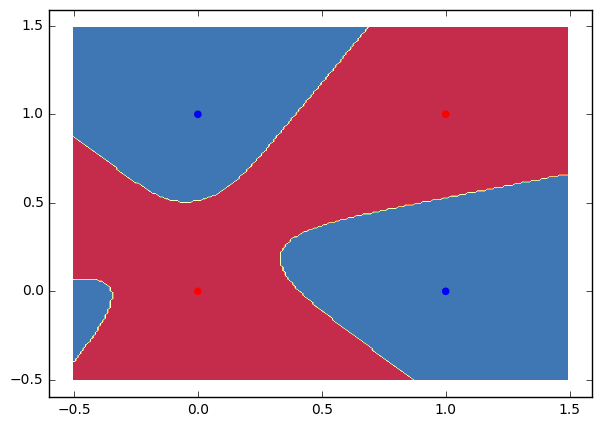

In [13]:
visualize_lr(parameters, X, Y)